<a href="https://colab.research.google.com/github/happy-table/Machine-Learning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np


In [ ]:
dataset = load_digits()


In [ ]:
print(dataset.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
df = pd.DataFrame(dataset.data , columns=dataset.feature_names)
df['target']=dataset.target


In [ ]:
print(dataset.data.shape)

(1797, 64)


In [ ]:
print(df)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0      

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df.isna().head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [ ]:
df.to_csv('digit.csv',index=False)


In [ ]:
from google.colab import files
files.download("digit.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

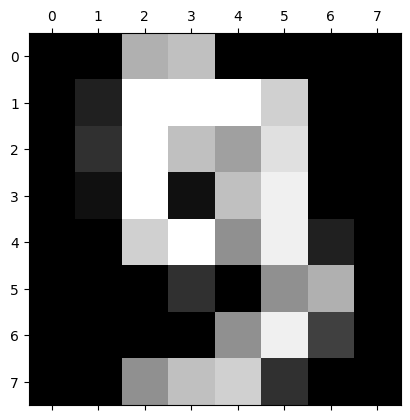

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

In [ ]:
n=9
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[n])
plt.show()

dataset.images[n]

<Figure size 640x480 with 0 Axes>

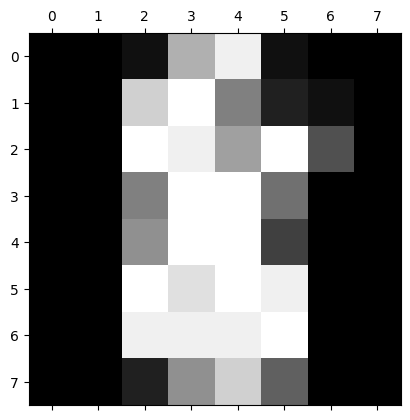

array([[ 0.,  0.,  1., 11., 15.,  1.,  0.,  0.],
       [ 0.,  0., 13., 16.,  8.,  2.,  1.,  0.],
       [ 0.,  0., 16., 15., 10., 16.,  5.,  0.],
       [ 0.,  0.,  8., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  4.,  0.,  0.],
       [ 0.,  0., 16., 14., 16., 15.,  0.,  0.],
       [ 0.,  0., 15., 15., 15., 16.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 13.,  6.,  0.,  0.]])

In [ ]:
n=-3
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[n])
plt.show()

dataset.images[n]

In [ ]:
dataimagelenth = len(dataset.images)
print(dataimagelenth)

1797


In [ ]:
x= dataset.images.reshape((dataimagelenth,-1))
print(x)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
y=dataset.target
print(y)


[0 1 2 ... 8 9 8]


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(1347, 64)
(450, 64)


In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

[3]


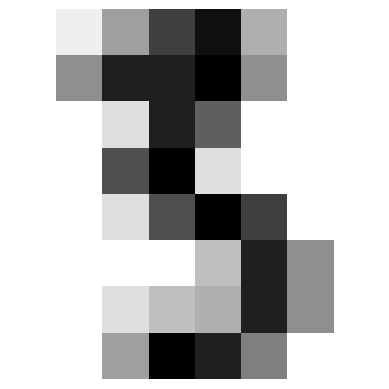

In [ ]:
n=1670
result = model.predict(dataset.images[n].reshape((1,-1)))
plt.imshow(dataset.images[n],cmap=plt.cm.gray_r,interpolation='nearest')
plt.axis('off')
print(result)
plt.show()

In [ ]:
y_pred =model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [8 8]
 [2 2]
 [6 6]
 [6 6]
 [7 7]
 [1 1]
 [9 9]
 [8 8]
 [5 5]
 [2 2]
 [8 8]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [1 1]
 [0 0]
 [5 5]
 [8 8]
 [8 8]
 [7 7]
 [8 8]
 [4 4]
 [7 7]
 [5 5]
 [4 4]
 [9 9]
 [2 2]
 [9 9]
 [4 4]
 [7 7]
 [6 6]
 [8 8]
 [9 9]
 [4 4]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [8 8]
 [6 6]
 [7 7]
 [7 7]
 [1 1]
 [0 0]
 [7 7]
 [6 6]
 [2 2]
 [1 1]
 [9 9]
 [6 6]
 [7 7]
 [9 9]
 [0 0]
 [0 0]
 [5 5]
 [1 1]
 [6 6]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [4 4]
 [1 1]
 [9 9]
 [2 2]
 [6 6]
 [9 9]
 [1 1]
 [8 8]
 [3 3]
 [5 5]
 [1 1]
 [2 2]
 [8 8]
 [2 2]
 [2 2]
 [9 9]
 [7 7]
 [2 2]
 [3 3]
 [6 6]
 [0 0]
 [5 5]
 [3 3]
 [7 7]
 [5 5]
 [1 1]
 [2 2]
 [9 9]
 [9 9]
 [3 3]
 [1 1]
 [7 7]
 [7 7]
 [4 4]
 [8 8]
 [5 5]
 [8 8]
 [5 5]
 [5 5]
 [2 2]
 [5 5]
 [9 9]
 [0 0]
 [7 7]
 [1 1]
 [4 4]
 [4 7]
 [3 3]
 [4 4]
 [8 8]
 [9 9]
 [7 7]
 [9 9]
 [8 8]
 [2 2]
 [1 6]
 [5 5]
 [2 2]
 [5 5]
 [8 8]
 [4 4]
 [1 8]
 [7 7]
 [0 0]
 [6 6]
 [1 1]
 [5 5]
 [5 9]
 [9 9]
 [9 9]
 [5 5]
 [9 9]
 [9 9]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [2 2]
 [8 8]
 [6 6]

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy:{0}".format(accuracy_score(y_test,y_pred)*100))

accuracy:97.11111111111111


In [ ]:
from sklearn import svm
model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.001,C=0.1)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

y_predmodel1 = model1.predict(x_test)
y_predmodel2 = model2.predict(x_test)
y_predmodel3 = model3.predict(x_test)
y_predmodel4 = model4.predict(x_test)

print("accuracy of model1:{0}".format(accuracy_score(y_test,y_predmodel1)*100))
print("accuracy of model2:{0}".format(accuracy_score(y_test,y_predmodel2)*100))
print("accuracy of model3:{0}".format(accuracy_score(y_test,y_predmodel3)*100))
print("accuracy of model4:{0}".format(accuracy_score(y_test,y_predmodel4)*100))

accuracy of model1:97.11111111111111
accuracy of model2:99.11111111111111
accuracy of model3:99.55555555555556
accuracy of model4:96.66666666666667


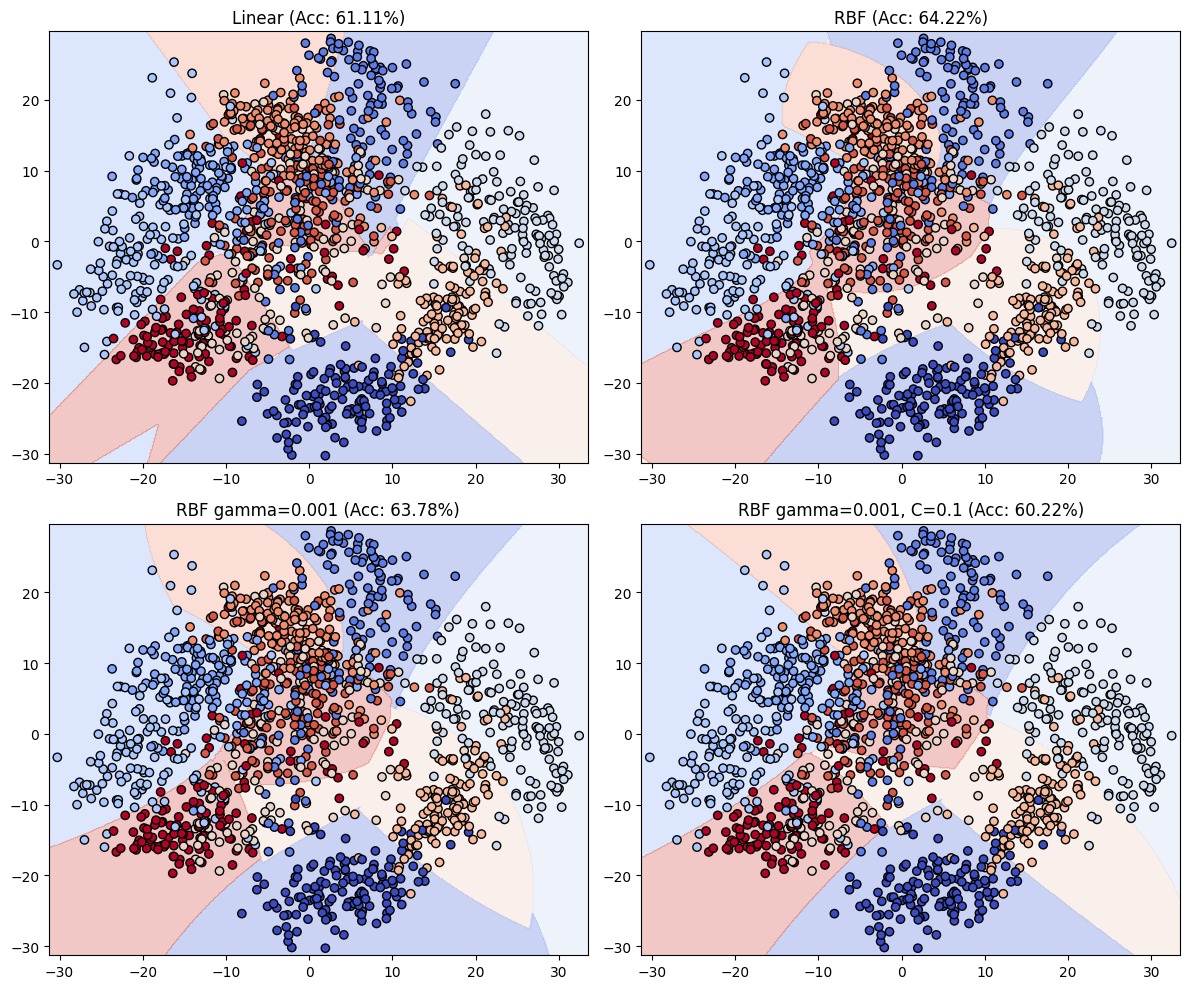

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Define your models
models = [
    ("Linear", svm.SVC(kernel='linear')),
    ("RBF", svm.SVC(kernel='rbf')),
    ("RBF gamma=0.001", svm.SVC(gamma=0.001)),
    ("RBF gamma=0.001, C=0.1", svm.SVC(gamma=0.001, C=0.1))
]

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


# Train and plot each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models):
    model.fit(x_train_pca, y_train)
    acc = accuracy_score(y_test, model.predict(x_test_pca)) * 100

    # Create mesh grid
    x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
    y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and training data
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    axes[i].scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f"{name} (Acc: {acc:.2f}%)")

plt.tight_layout()
plt.show()